In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

%matplotlib inline

In [24]:
df = pd.read_csv('amz.csv')

In [25]:
pd.set_option('display.max_rows', 100)

In [26]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


- Tabla cruzada entre 'category' e 'isBestSeller'

In [27]:
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

In [28]:
crosstab

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


- Proporción de productos que son best-sellers dentro de cada categoría, es el True / Total (True + False)

In [29]:
crosstab['proportion_best_seller'] = crosstab[True] / (crosstab[True] + crosstab[False])

In [30]:
crosstab

isBestSeller,False,True,proportion_best_seller
category,,,
3D Printers,247,1,0.004032
3D Printing & Scanning,4065,2,0.000492
Abrasive & Finishing Products,245,5,0.020000
Action Cameras,1696,1,0.000589
Adapters,251,3,0.011811
...,...,...,...
Wind Instruments,243,7,0.028000
Window Treatments,234,5,0.020921
Women,17559,213,0.011985


- Categorías ordenadas por la proporción de best sellers en orden descendente.

In [36]:
crosstab = crosstab.sort_values('proportion_best_seller', ascending=False)

In [37]:
crosstab

isBestSeller,False,True,proportion_best_seller
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
...,...,...,...
"CD, Disc & Tape Players",8798,0,0.000000
General Music-Making Accessories,259,0,0.000000
Snowboard Boots,1449,0,0.000000


In [38]:
crosstab = crosstab.drop(columns=['proportion_best_seller'])

In [43]:
crosstab

isBestSeller,False,True
category,,
Grocery,9008,556
Smart Home Security & Lighting,98,6
Health & Personal Care,9017,552
Mobile Phone Accessories,248,11
Power & Hand Tools,8353,306
...,...,...
"CD, Disc & Tape Players",8798,0
General Music-Making Accessories,259,0
Snowboard Boots,1449,0


- Chi-square para ver si la distribución de los productos best seller es independiente de la categoría del producto.

In [39]:
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab)

In [40]:
print("Chi-square Statistic:", chi2_statistic)
print("p-value:", chi2_p_value)

Chi-square Statistic: 36540.20270061387
p-value: 0.0


- Calculamos la asociación utilizando el método de Cramer

In [41]:
cramers_v_value = association(crosstab, method="cramer")

In [42]:
print("Cramér's V:", cramers_v_value)

Cramér's V: 0.1222829439760564


- Muchas categorías en la variable category (296 filas). Más categorías significan más comparaciones entre las frecuencias observadas y las esperadas, por lo que el valor de Chi-square será mayor.

- Un valor alto indica grandes diferencias entre lo observado y lo esperado, lo que sugiere una relación alta.

- Grados de libertad: 296-1: 295 x (2-1): 295

- Valor p de 0.0 indica que la relación entre categoría y ser best-seller podría ser significativa (no ocurre por azar).

- Valor de Cramer de 0.122: aunque hay una relación, no es muy fuerte.

- Esto significa que aunque la categoría de un producto influye en si es un best-seller, no es el único factor determinante, hay otros factores importantes en juego.

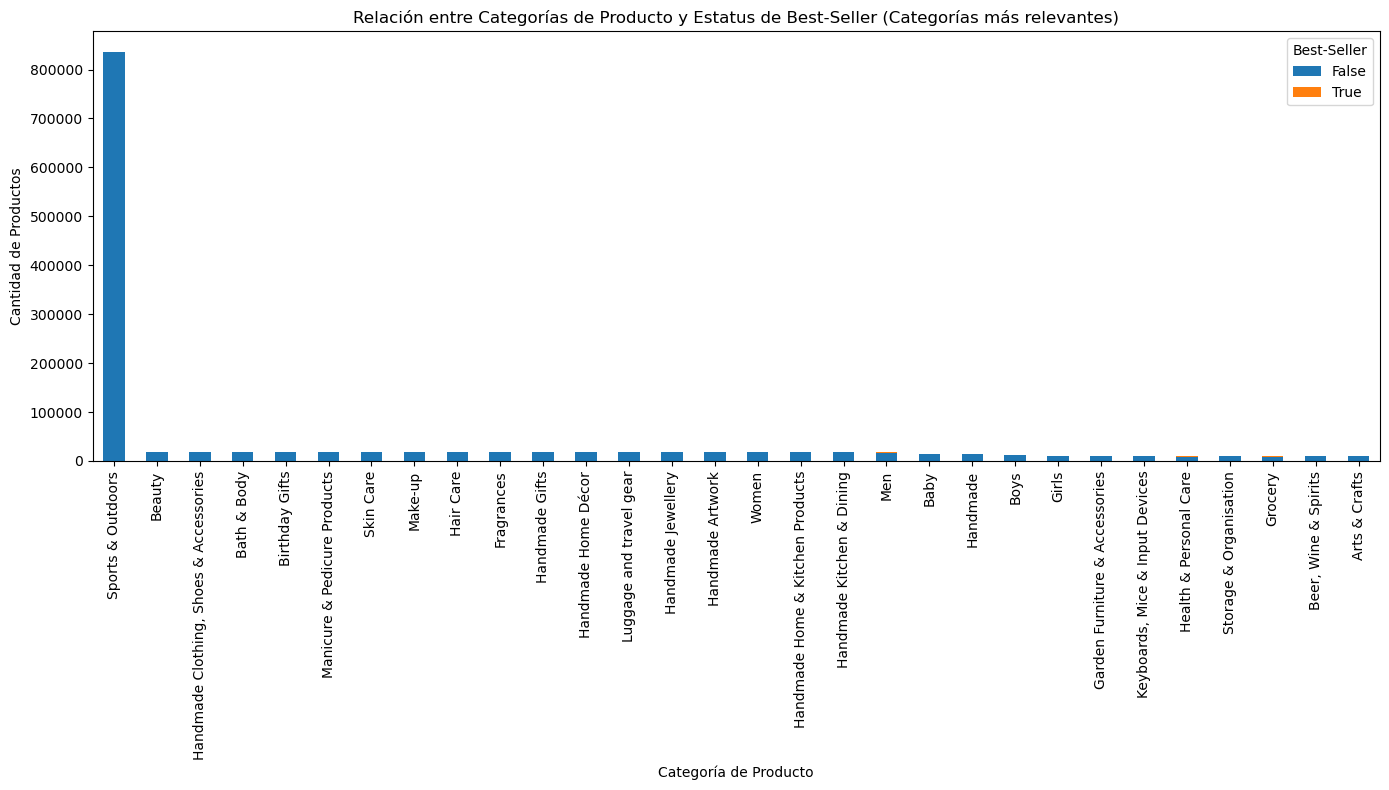

In [55]:
crosstab['total'] = crosstab[False] + crosstab[True]
crosstab_chart = crosstab.sort_values(by='total', ascending=False).head(30)
crosstab_chart = crosstab_chart.drop(columns=['total'])
crosstab_chart.plot(kind='bar', stacked=True, figsize=(14, 8))

plt.title('Relación entre Categorías de Producto y Estatus de Best-Seller (Categorías más relevantes)')
plt.xlabel('Categoría de Producto')
plt.ylabel('Cantidad de Productos')
plt.legend(title='Best-Seller')
plt.tight_layout()

- Sumo las columnas False y True para obtener el total de productos por categoría.
- Ordeno por el total de productos en cada categoría y seleccionar las más importantes (30).
- Elimino la columna 'total' recién creada para el gráfico.

In [66]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

df_cleaned

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


- Calcular Q1 y Q3: df['price'].quantile(0.25) obtiene el valor de Q1 y df['price'].quantile(0.75) obtiene el valor de Q3.
- Calcular el IQR: es la diferencia entre Q3 y Q1, que mide la dispersión de la mayoría de los datos.
- Límites inferior y superior: Estos valores definen el rango dentro del cual se consideran normales los precios. Cualquier precio fuera de este rango se considera un outlier.
- Filtrar el DataFrame: Se crean condiciones para que solo los precios dentro de los límites calculados sean incluidos en df_cleaned. Este nuevo DataFrame df_cleaned contiene los datos sin los outliers en los precios

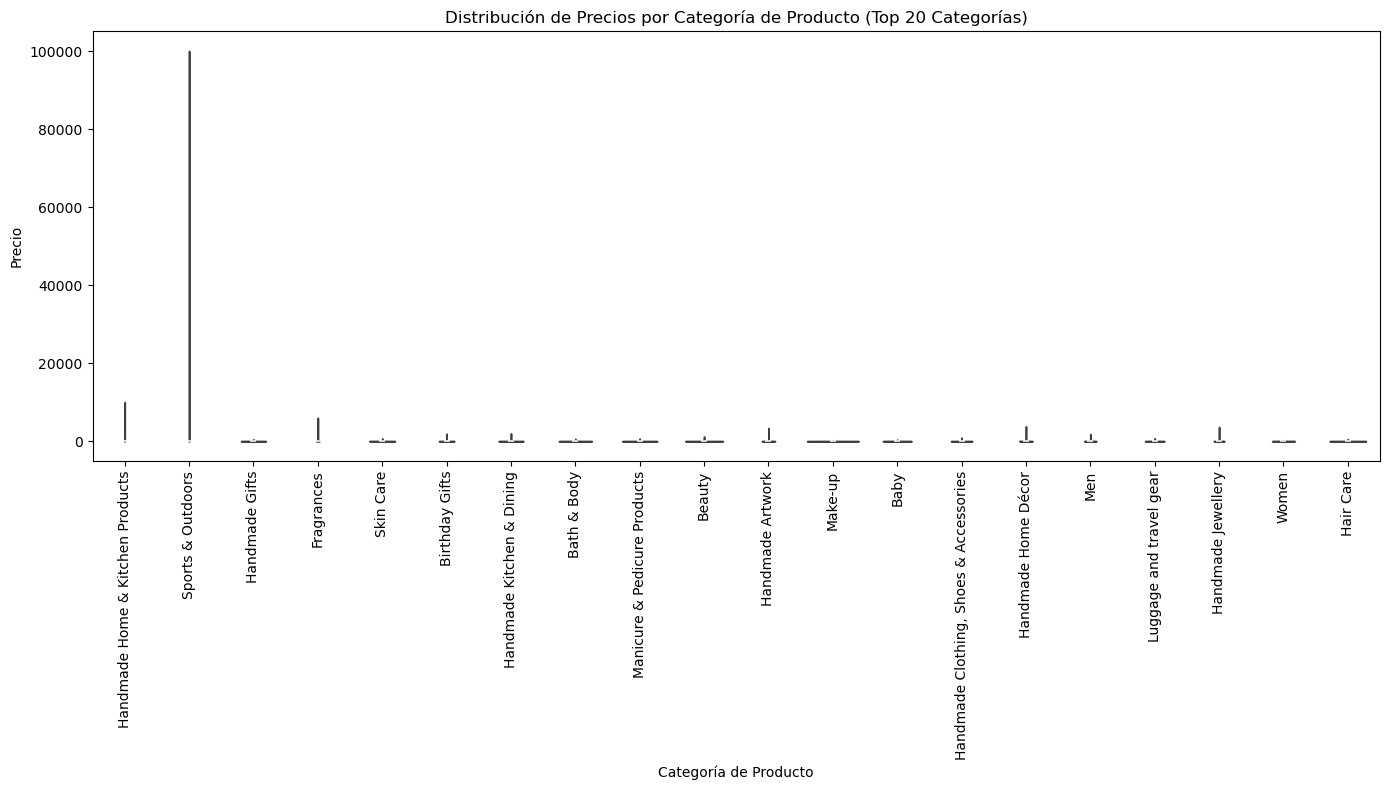

('Laptops', 1042.725)

In [58]:
# Filtrar previamente las categorías más relevantes.
df_sample = df.sample(frac=0.1, random_state=1)  # Usa el 10% del DataFrame para este ejemplo

# Cálculo
top_categories = df_sample['category'].value_counts().head(20).index
df_top_categories = df[df['category'].isin(top_categories)]

# Violin plot para las 20 categorías filtradas
plt.figure(figsize=(14, 8))
sns.violinplot(x='category', y='price', data=df_top_categories)
plt.xticks(rotation=90)
plt.title('Distribución de Precios por Categoría de Producto (Top 20 Categorías)')
plt.xlabel('Categoría de Producto')
plt.ylabel('Precio')
plt.tight_layout()

# Identificar la categoría con la mediana de precio más alta (sin filtrar)
median_prices = df.groupby('category')['price'].median().sort_values(ascending=False)

# Mostrar la categoría con la mediana más alta
highest_median_category = median_prices.idxmax()
highest_median_price = median_prices.max()

In [67]:
median_prices

category
Laptops                      1042.725
Desktop PCs                   810.400
Snowboards                    366.725
Home Audio Record Players     326.080
3D Printers                   319.000
                               ...   
Adapters                        7.050
Make-up                         7.000
Signs & Plaques                 6.990
Arts & Crafts                   5.990
Office Paper Products           4.380
Name: price, Length: 296, dtype: float64

In [68]:
highest_median_category

'Laptops'

In [69]:
highest_median_price

1042.725

- df.sample(frac=0.1, random_state=1) para tomar una muestra aleatoria del 10% del DataFrame. Esto reduce la cantidad de datos procesados inicialmente.
- El cálculo de la mediana de precio más alta se realiza en todo el DataFrame, sin filtrar.
- Agrupación los datos por categoría y calculamos la mediana del precio para cada una usando groupby y median.
- Ordenación de las categorías por su mediana de precio y seleccionamos la más alta con idxmax().

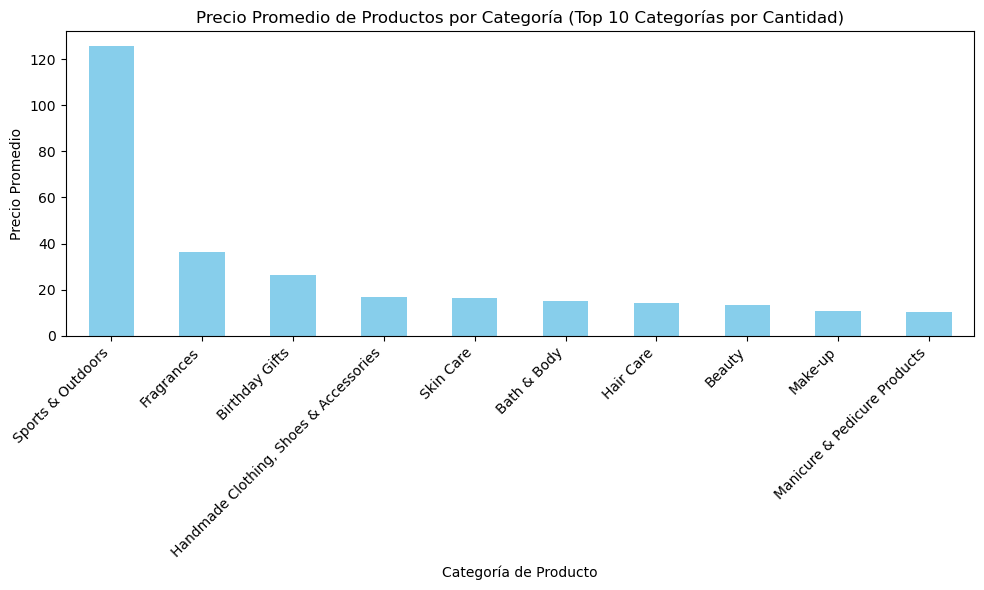

('Laptops', 1087.987826986755)

In [59]:
# Filtrado de las 10 categorías principales basadas en el número de productos.
top_categories_by_count = df['category'].value_counts().head(10).index
df_top_categories = df[df['category'].isin(top_categories_by_count)]

# Cálculo del precio promedio para estas categorías
average_price_per_category = df_top_categories.groupby('category')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
average_price_per_category.plot(kind='bar', color='skyblue')
plt.title('Precio Promedio de Productos por Categoría (Top 10 Categorías por Cantidad)')
plt.xlabel('Categoría de Producto')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Identificar la categoría con el precio promedio más alto (sin filtrar)
overall_highest_avg_price_category = df.groupby('category')['price'].mean().idxmax()
overall_highest_avg_price = df.groupby('category')['price'].mean().max()

In [70]:
overall_highest_avg_price_category

'Laptops'

In [71]:
overall_highest_avg_price

1087.987826986755

- Calcular el precio promedio: agrupación por categoría y calculamos el precio promedio con mean(). Luego, ordenación los resultados de mayor a menor.
- Agrupación de los datos por categoría y calculo del precio promedio para todas las categorías.
- idxmax() para encontrar la categoría con el precio promedio más alto y max() para obtener ese valor.

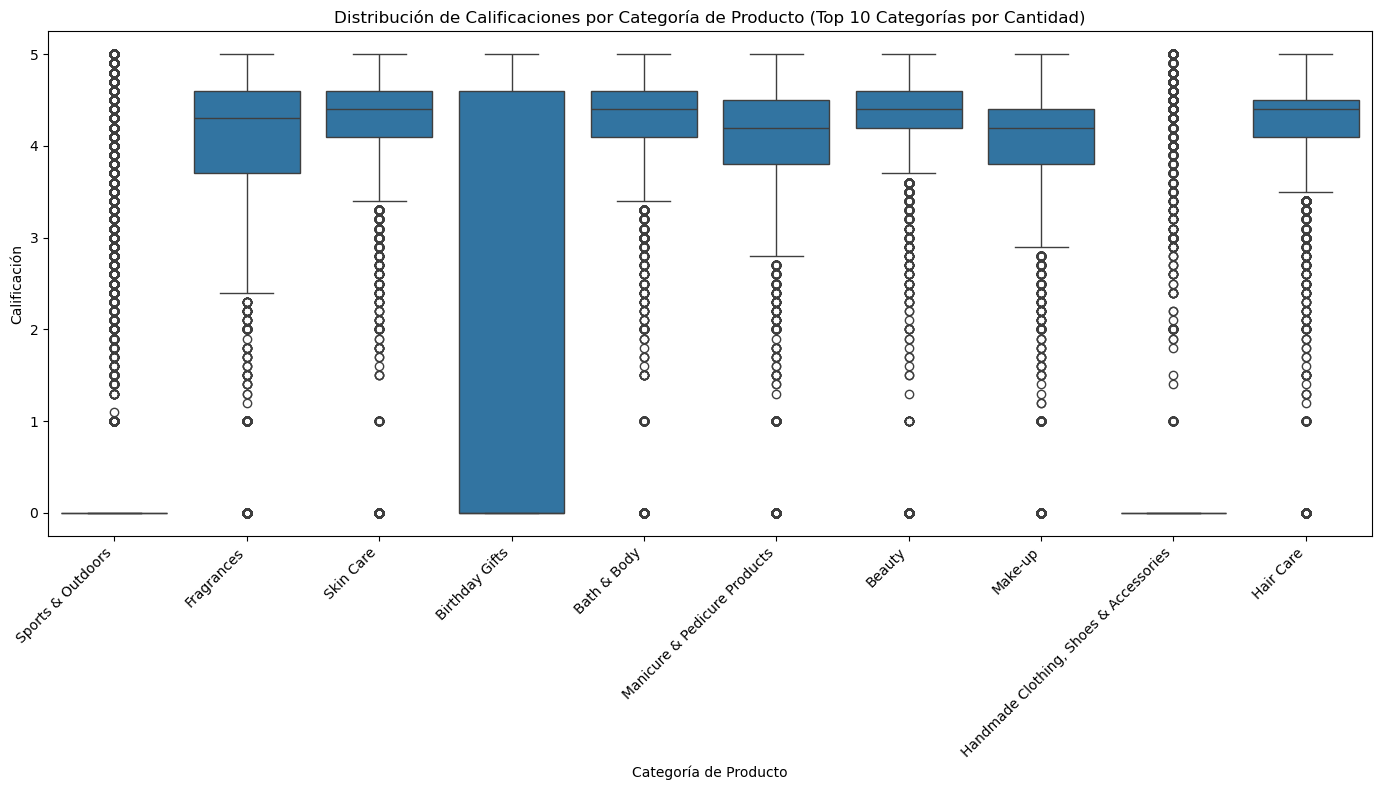

('Computer Memory', 4.7)

In [60]:
# 10 categorías principales basadas en la cantidad de productos.
top_categories_by_count = df['category'].value_counts().head(10).index
df_top_categories = df[df['category'].isin(top_categories_by_count)]

# Box plots lado a lado para las 10 categorías principales.
plt.figure(figsize=(14, 8))
sns.boxplot(x='category', y='stars', data=df_top_categories)
plt.xticks(rotation=45, ha='right')
plt.title('Distribución de Calificaciones por Categoría de Producto (Top 10 Categorías por Cantidad)')
plt.xlabel('Categoría de Producto')
plt.ylabel('Calificación')
plt.tight_layout()

# Categoría con la calificación mediana más alta (sin filtrar).
median_ratings = df.groupby('category')['stars'].median().sort_values(ascending=False)

# Categoría con la mediana más alta.
highest_median_rating_category = median_ratings.idxmax()
highest_median_rating = median_ratings.max()

In [72]:
highest_median_rating_category

'Computer Memory'

In [73]:
highest_median_rating

4.7

In [76]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


- Calcular el coeficiente de correlación entre 'price' y 'stars'

In [61]:
correlation_coefficient = df['price'].corr(df['stars'])

-0.1249067326214861

In [74]:
correlation_coefficient

-0.1249067326214861

- Si el valor está cerca de 1: Hay una fuerte correlación positiva, lo que significa que a medida que el precio aumenta, también tienden a aumentar las calificaciones.
- Si el valor está cerca de -1: Hay una fuerte correlación negativa, lo que significa que a medida que el precio aumenta, las calificaciones tienden a disminuir.
- Si el valor está cerca de 0: No hay una correlación lineal significativa entre el precio y las calificaciones.

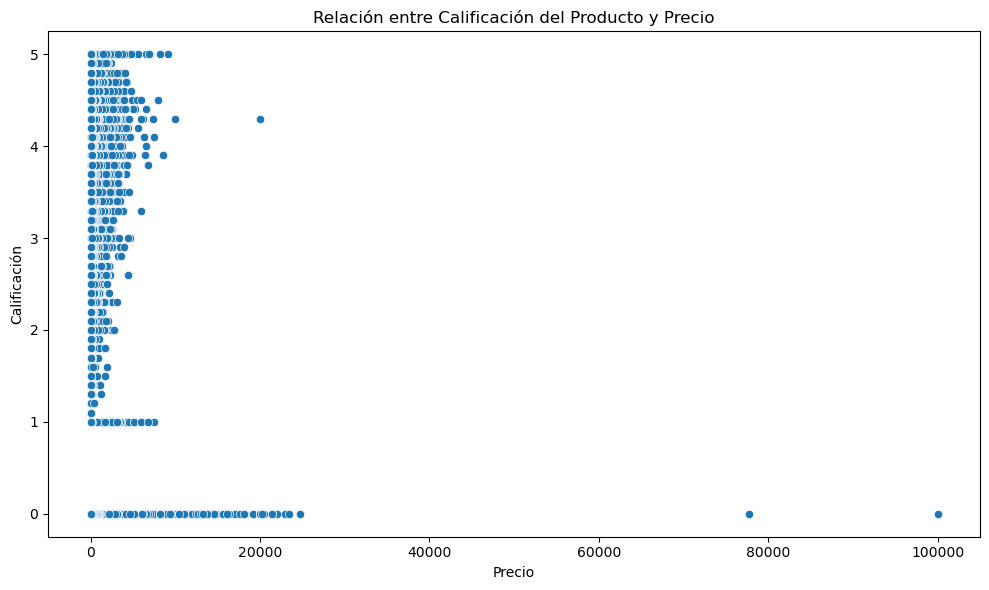

In [62]:
# Scatter plot para visualizar la relación entre calificación y precio.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='stars', data=df)
plt.title('Relación entre Calificación del Producto y Precio')
plt.xlabel('Precio')
plt.ylabel('Calificación')
plt.tight_layout()

- Dispersión de los puntos : poca dispersión sugiere una relación fuerte, mucha dispersión indica una relación débil.

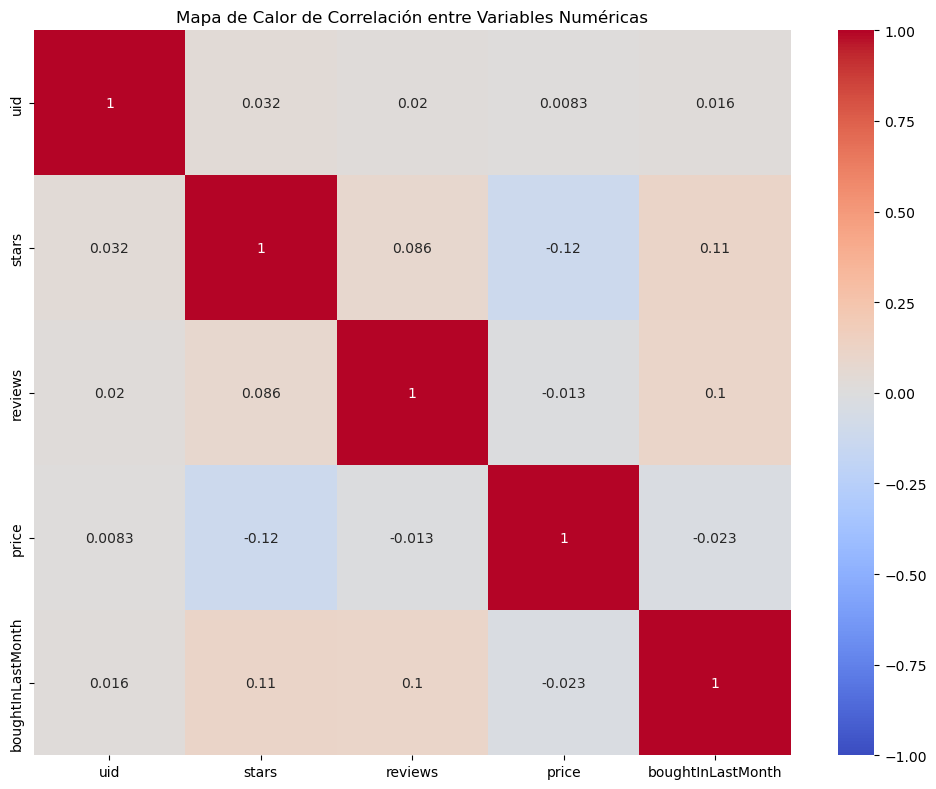

In [65]:
# Filtrar solo las columnas numéricas del DataFrame.
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Matriz de correlación para las variables numéricas.
correlation = numeric_df.corr()

# Heatmap para visualizar la matriz de correlación.
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlación entre Variables Numéricas')
plt.tight_layout()

- Valores cercanos a 1 o -1 : Indican una fuerte correlación positiva o negativa, respectivamente.
- Valores cercanos a 0 : Indican poca o ninguna variación.
- Colores : Los colores más oscuros indican una variación más fuerte (positiva o negativa), mientras que los colores claros indican una variación más débil.

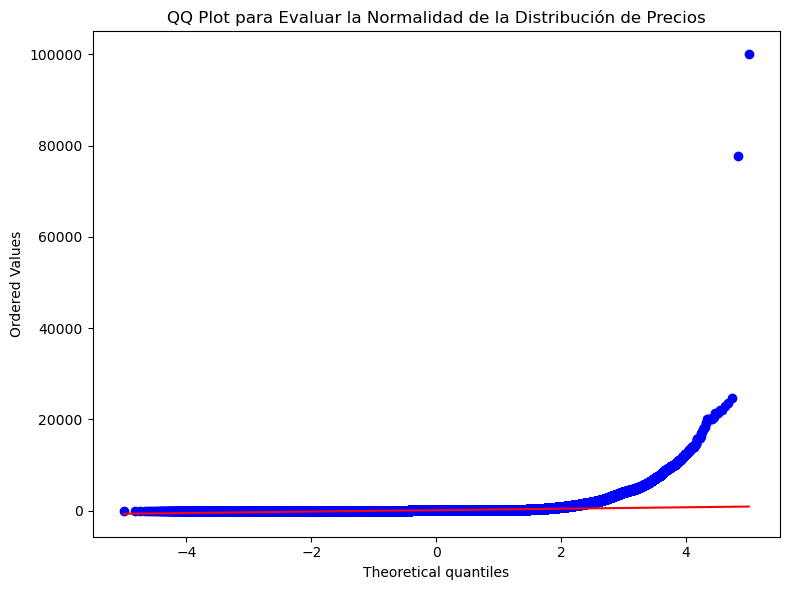

In [75]:
# QQ plot para examinar la normalidad de la distribución de precios.
plt.figure(figsize=(8, 6))
stats.probplot(df['price'], dist="norm", plot=plt)
plt.title('QQ Plot para Evaluar la Normalidad de la Distribución de Precios')
plt.tight_layout()

- Desviaciones significativa de la línea recta : Indica que la distribución de precios no es normal.